# Movie Recommendation by Surprise

## Matrix Factorization method for Collaborative Filtering
Matrix Factorization is a popular technique used in collaborative filtering to predict user-item ratings based on the previous ratings given by users. Collaborative Filtering is a type of recommendation system that relies on the past behavior of similar users/items to make recommendations.

Matrix Factorization is based on the idea of decomposing the user-item rating matrix into two lower-dimensional matrices: one representing users and the other representing items. The lower-dimensional representation captures the latent factors or features that influence a user's preference for an item. The factors may include, for example, the genre of the movie, the director, the actors, or the user's age, gender, etc.


- Data: [Link](https://www.kaggle.com/datasets/parasharmanas/movie-recommendation-system/data)

In [25]:
from surprise import Dataset, Reader
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.dataset import DatasetAutoFolds
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import operator

In [3]:
df = pd.read_csv('./data/ratings.csv')
print(len(df))

25000095


In [22]:
df.head(4)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820


In [4]:
df=df[0:20000]

In [5]:
len(df)

20000

In [6]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df[['userId','movieId','rating']], reader)
print(type(data))

<class 'surprise.dataset.DatasetAutoFolds'>


In [7]:
# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25)
print(type(trainset))

<class 'surprise.trainset.Trainset'>


In [23]:
import itertools

for uid, iid, rating in itertools.islice(trainset.all_ratings(), 5):
    print(f"User {uid} rated item {iid} with a rating of {rating}")

print()
for uid, iid, rating in testset[:5]:
    print(f"User {uid} rated item {iid} with a rating of {rating}")
    
print()    
print(trainset.n_ratings,len(testset))

User 0 rated item 0 with a rating of 3.0
User 0 rated item 18 with a rating of 5.0
User 0 rated item 28 with a rating of 4.0
User 0 rated item 68 with a rating of 4.0
User 0 rated item 84 with a rating of 4.0

User 3 rated item 4027 with a rating of 4.5
User 3 rated item 6333 with a rating of 4.0
User 80 rated item 2058 with a rating of 4.0
User 8 rated item 1 with a rating of 4.0
User 80 rated item 3948 with a rating of 5.0

15000 5000


## KNNBasic
KNNBasic is one of the algorithms for making recommendations based on collaborative filtering in the Surprise library. KNN stands for k-nearest neighbors, and this algorithm makes recommendations by finding a set of similar items or users in close proximity and predicting ratings based on them.

In [9]:
# Use the KNNBasic algorithm to train the model
algo = KNNBasic()
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [10]:
# Test the model on the testing set
predictions = algo.test(testset)

In [11]:
for uid, iid, rating in testset[:5]:
    print(f"User {uid} rated item {iid} with a rating of {rating}")

User 3 rated item 4027 with a rating of 4.5
User 3 rated item 6333 with a rating of 4.0
User 80 rated item 2058 with a rating of 4.0
User 8 rated item 1 with a rating of 4.0
User 80 rated item 3948 with a rating of 5.0


The 'predictions' is a list of tuples of the form (user, item, actual_rating, predicted_rating, details). The predicted_rating is est value.

In [12]:
for prediction in predictions[0:5]:
    print(prediction)

user: 3          item: 4027       r_ui = 4.50   est = 4.13   {'actual_k': 14, 'was_impossible': False}
user: 3          item: 6333       r_ui = 4.00   est = 3.49   {'actual_k': 12, 'was_impossible': False}
user: 80         item: 2058       r_ui = 4.00   est = 3.72   {'actual_k': 4, 'was_impossible': False}
user: 8          item: 1          r_ui = 4.00   est = 3.96   {'actual_k': 34, 'was_impossible': False}
user: 80         item: 3948       r_ui = 5.00   est = 3.15   {'actual_k': 13, 'was_impossible': False}


In [13]:
# Print the performance metrics
accuracy.rmse(predictions)

RMSE: 0.9917


0.9916755372534861

In [14]:
true_ratings = [pred.r_ui for pred in predictions]
est_ratings = [pred.est for pred in predictions]
uids = [pred.uid for pred in predictions]

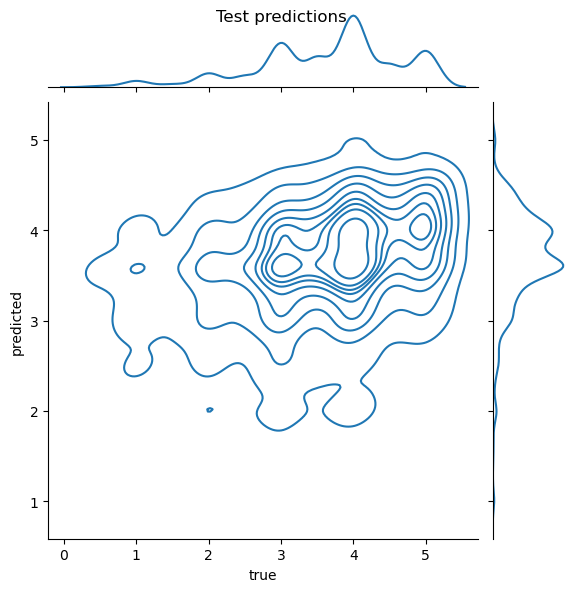

In [15]:
data=pd.DataFrame(columns=["true","predicted"])
data["true"]=true_ratings
data["predicted"]=est_ratings
g = sns.jointplot(data=data,x="true", y="predicted", kind="kde",)
g.fig.suptitle('Test predictions',fontsize=12)
plt.show()

# Recommend unseen movies for test set users

In [16]:
movies=pd.read_csv('./data/movies.csv')
mapping = movies.set_index("movieId")["title"].to_dict()

In [17]:
users=list(set(uids))

In [29]:
trainset.all_users()

range(0, 166)

In [18]:
# items which the user not yet evaluate
items = trainset.build_anti_testset()
for user in users[0:30]:
    user_items = list(filter(lambda x: x[0] == user, items))
    #print(user,len(user_items))
    # generate recommendation
    recommendations = algo.test(user_items)
    if len(recommendations)>0:
        recommendations.sort(key=operator.itemgetter(3), reverse=True)
        print(f"For User {user}, Recommendations:")
        for r in recommendations[0:5]:
            print(f"  {mapping[r[1]]} : Estimated rating {round(r[3],4)}")

For User 1, Recommendations:
  American Dream (1990) : Estimated rating 5
  Speechless (1994) : Estimated rating 5
  Abbott and Costello Meet Frankenstein (1948) : Estimated rating 5
  Vampire Academy (2014) : Estimated rating 5
  War of the Worlds, The (1953) : Estimated rating 5
For User 2, Recommendations:
  American Dream (1990) : Estimated rating 5
  Abbott and Costello Meet Frankenstein (1948) : Estimated rating 5
  Vampire Academy (2014) : Estimated rating 5
  Shenandoah (1965) : Estimated rating 5
  Sweet Red Bean Paste (2015) : Estimated rating 5
For User 3, Recommendations:
  American Dream (1990) : Estimated rating 5
  Abbott and Costello Meet Frankenstein (1948) : Estimated rating 5
  Vampire Academy (2014) : Estimated rating 5
  Shenandoah (1965) : Estimated rating 5
  Sweet Red Bean Paste (2015) : Estimated rating 5
For User 4, Recommendations:
  American Dream (1990) : Estimated rating 5
  Abbott and Costello Meet Frankenstein (1948) : Estimated rating 5
  Vampire Academ